In [207]:
import sys
sys.version

'3.6.9 (default, Oct  6 2019, 21:40:49) \n[GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)]'

# A Layered Grammar of Graphics

Code examples of R's ggplot functions adapted to Python's plotnine library.


In [54]:
import numpy as np
import pandas as pd
from plotnine import *

import seaborn as sns
diamonds = sns.load_dataset("diamonds")


In [55]:
diamonds.describe()

diamonds.value_counts()

carat  cut        color  clarity  depth  table  price  x     y     z   
0.79   Ideal      G      SI1      62.3   57.0   2898   5.90  5.85  3.66    5
1.50   Good       I      VS1      57.2   62.0   9702   7.64  7.61  4.36    2
0.30   Good       J      VS1      63.4   57.0   394    4.23  4.26  2.69    2
1.50   Fair       H      SI1      65.0   57.0   6838   7.10  7.06  4.60    2
0.30   Ideal      H      SI1      62.2   57.0   450    4.27  4.28  2.66    2
                                                                          ..
1.00   Very Good  I      SI1      63.3   54.0   3640   6.39  6.34  4.03    1
                                  63.2   56.0   4088   6.37  6.31  4.01    1
                                  63.1   58.0   4149   6.30  6.35  3.99    1
                                  63.0   58.0   4125   6.30  6.33  3.98    1
0.20   Ideal      D      VS2      61.5   57.0   367    3.81  3.77  2.33    1
Length: 53794, dtype: int64

In [56]:
## plotting functions
# import math
# df = pd.DataFrame({'x':np.arange(0.1,10,0.1)})
# ggplot(df, aes(x='x')) + \
#     stat_function(fun=lambda x: math.log(x))

In [57]:
# Examples of legends from four different scales.  From left to right:
# continuous variable mapped to size and colour, discrete variable
# mapped to shape and colour.  The legend automatically responds to the
# the geoms used in the plot, from left to right: points, tiles,
# points, points \& lines.

In [58]:
# df <- data.frame(a = letters[1:5], b = seq(2, 10, 2))
df = pd.DataFrame(
    {
    'x': range(0,5),
    'y': range(0,5),
    'a':['A','B','C','D','E'],
    'b':range(2,12,2)}
)
df

,x,y,a,b
0,0,0,A,2
1,1,1,B,4
2,2,2,C,6
3,3,3,D,8
4,4,4,E,10


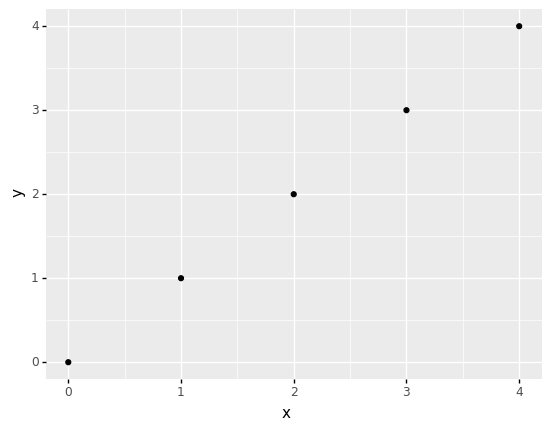

<ggplot: (340510710)>

In [59]:
# p <- qplot(1:5, 1:5, data=df) + opts(keep = "legend_box")
p = qplot(data=df, x='x', y='y')
p

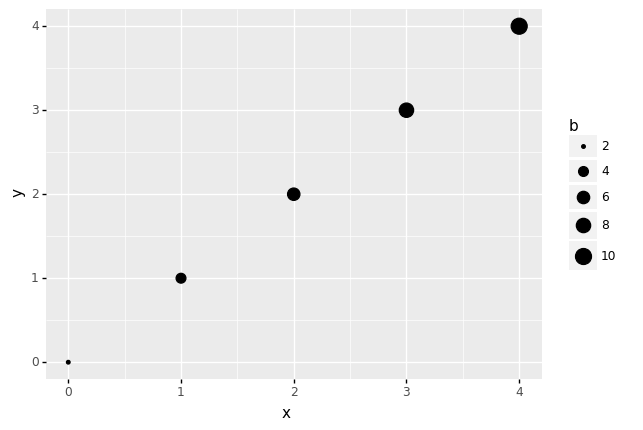

<ggplot: (340516430)>

In [60]:
# p + aes(size = b) + scale_size("")
p + aes(size = "b") + scale_size()

# equiv
# ggplot(aes(x='x', y='y', size = "b"), data=df) + geom_point() + scale_size()

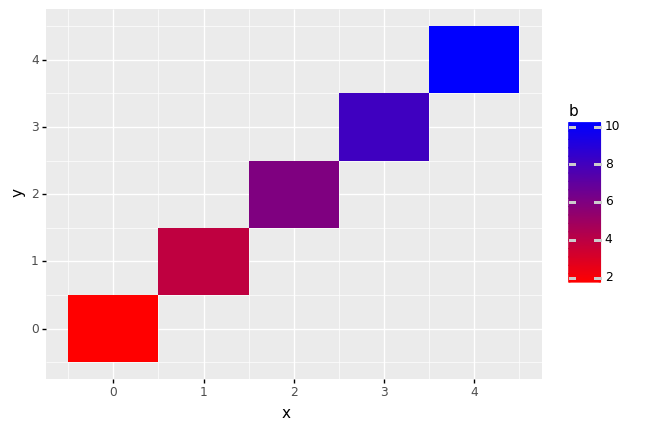

<ggplot: (339217072)>

In [61]:
# p + aes(fill = b) + geom_tile() + 
#   scale_fill_gradient("", low="red", high="blue")
p + aes(fill = "b") + geom_tile() + \
   scale_fill_gradient(low="red", high="blue")


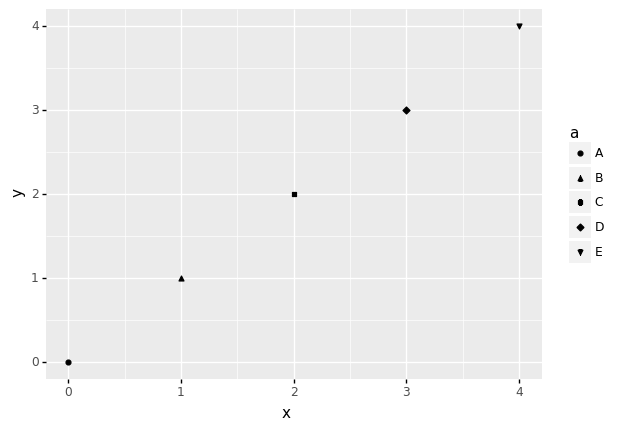

<ggplot: (339983445)>

In [62]:
# p + aes(shape = a) + scale_shape("")
p + aes(shape = "a") + scale_shape()

/Users/ivan/Projects/Minireference/STATSbook/Code/venv/lib/python3.6/site-packages/plotnine/geoms/geom_path.py:83: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


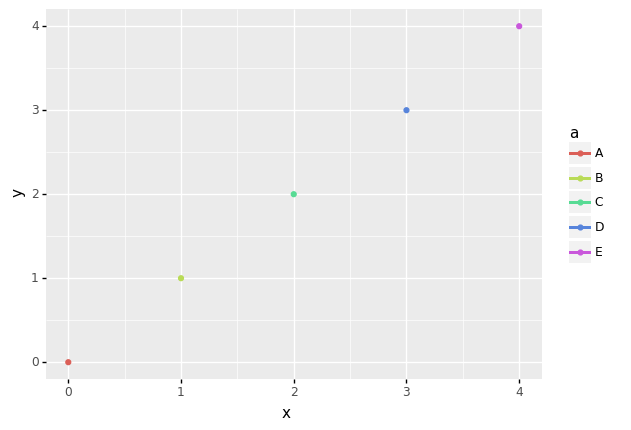

<ggplot: (-9223372036515709461)>

In [63]:
# p + aes(colour = a) + geom_line() + scale_colour_hue("")
p + aes(colour = "a") + geom_line() + scale_colour_hue()

In [ ]:
aa

## Part II

Examples of axes and grid lines for three coordinate systems:
Cartesian, semi-log and polar. The polar coordinate system
illustrates the difficulties associated with non-Cartesian
coordinates: it is hard to draw the axes well.

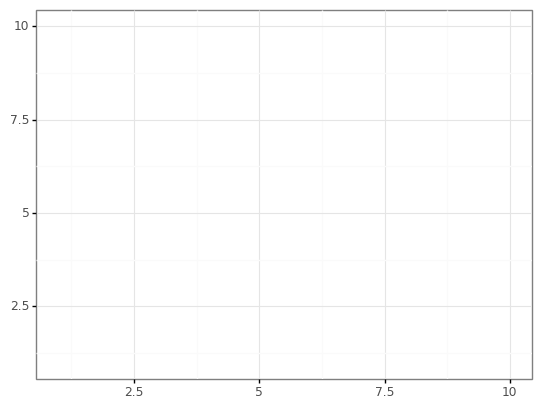

<ggplot: (-9223372036511699438)>

In [70]:
x1 = range(1, 11)
y1 = range(1, 11)
p = qplot(x1, y1, geom="blank", xlab=None, ylab=None) + theme_bw()
p  # linear scale for y-axis

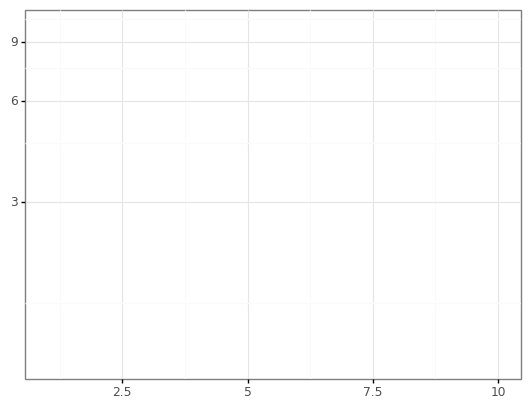

<ggplot: (343078299)>

In [71]:
p + coord_trans(y="log10")  # log-scale y-axis

In [68]:
# p + coord_polar()
# polar-coordinates are not available in plotnine yet
# https://github.com/has2k1/plotnine/issues/10


### PART III

(Left) Scatterplot of price vs carat.
(Right) scatterplot of price vs carat, with log-transformed scales, and a linear smooth layered on top.

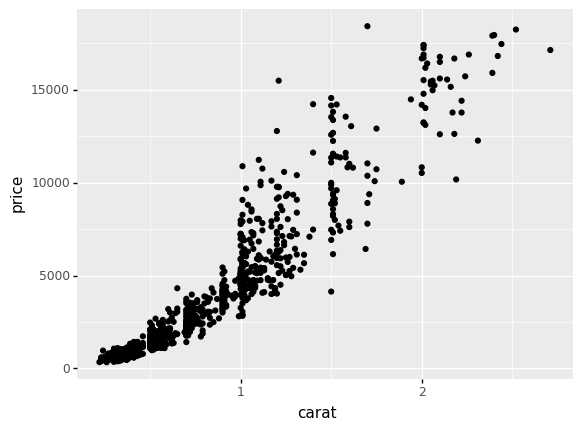

<ggplot: (340383275)>

In [79]:
# dsmall <- diamonds[sample(nrow(diamonds),1000), ]
diamondsk = diamonds.sample(n=1000)
qplot('carat', 'price', data = diamondsk)

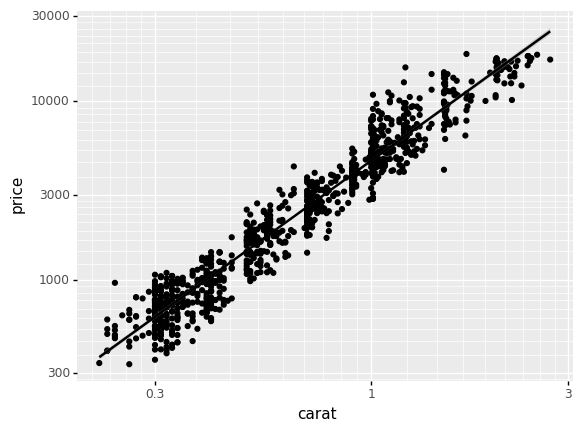

<ggplot: (338777741)>

In [80]:
qplot('carat', 'price', data = diamondsk, log="xy") + \
    geom_smooth(method = "lm")

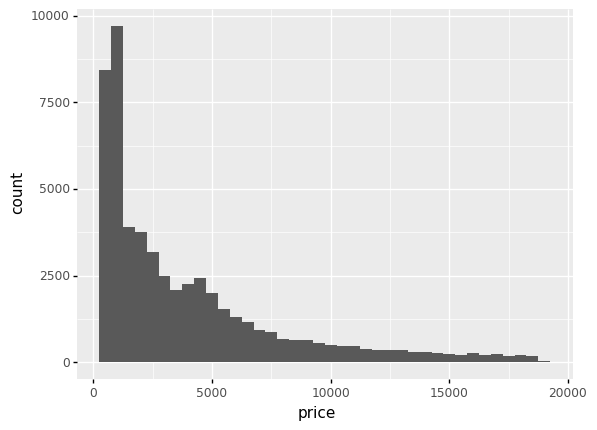

<ggplot: (339244962)>

In [87]:
# Two histograms of diamond price produced by the histogram geom.
# (Left) Default bin width, 30 bins. (Right) Custom \$50 bin width
# reveals missing data.
# qplot('price', data=diamonds, geom="histogram")  # BAD
# qplot('price', data=diamonds, geom="histogram", binwidth=50)  # WORSE
qplot('price', data=diamonds, geom="histogram", binwidth=500)  # OK

# Variations on the histogram.  Using a ribbon (left) to produce a
# frequency polygon, or points (right) to produce an unnamed graphic.
# qplot('price', data=diamonds, stat="bin", geom="point", binwidth = 1000)
# qplot('price', data=diamonds, stat="bin", geom="area", binwidth = 1000)

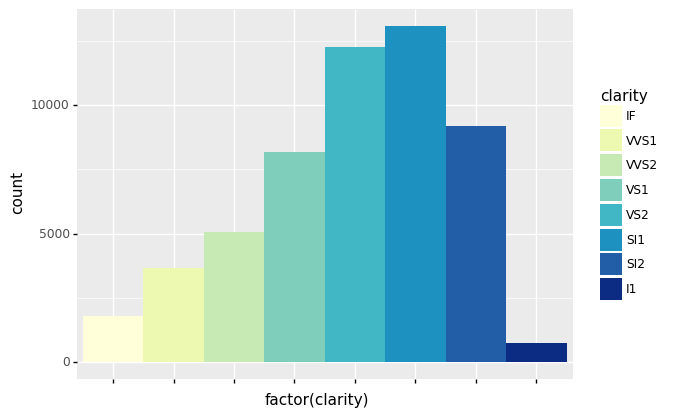

<ggplot: (-9223372036513919614)>

In [101]:
qplot("clarity", data=diamonds, geom="blank", fill="clarity") + \
    scale_fill_brewer(palette="YlGnBu") + \
    aes(x = "factor(clarity)") + \
    scale_x_discrete(labels = "") + \
    geom_bar(width = 1)


## Transformations of data vs. scale

```
# Transforming the data (left) vs transforming the scale (right).  From
# a distance the plots look identical.  Close inspection is required to
# see that the scales and minor grid lines are different.  Transforming
# the scale is to be preferred as the axes are labelled according to
# the original data, and so are easier to interpret.  The presentation
# of the labels still requires work.
```


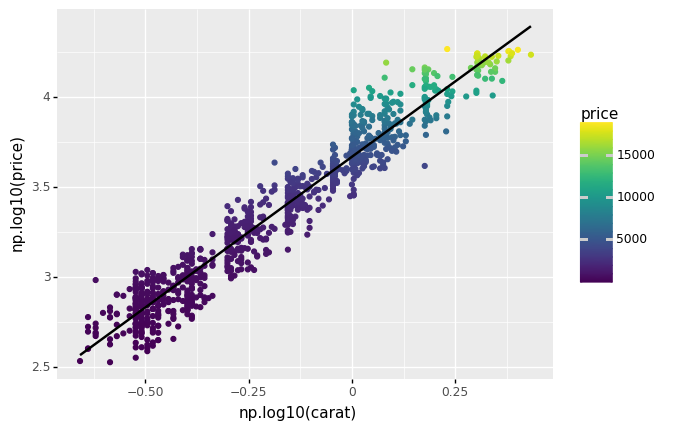

<ggplot: (340957921)>

In [115]:
lmfit = geom_smooth(method = "lm", se = False)
qplot("np.log10(carat)", "np.log10(price)", data = diamondsk, color="price") + lmfit


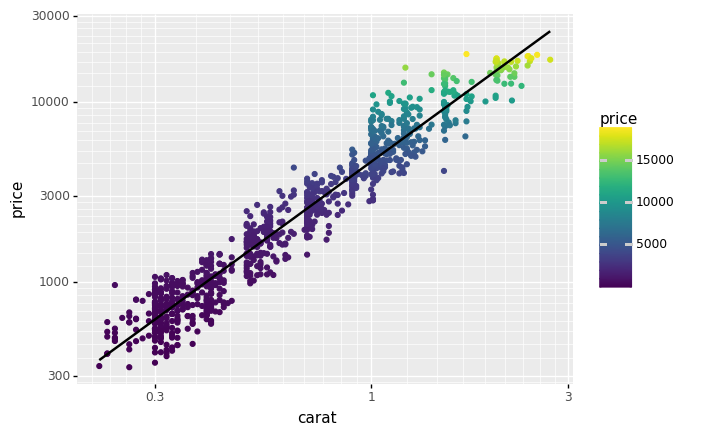

<ggplot: (341081057)>

In [116]:
qplot("carat", "price", data = diamondsk, log="xy", color="price") + lmfit

In [140]:
# diamondsk['price'] = diamondsk['price'].astype('float')
diamondsk.dropna(inplace=True)

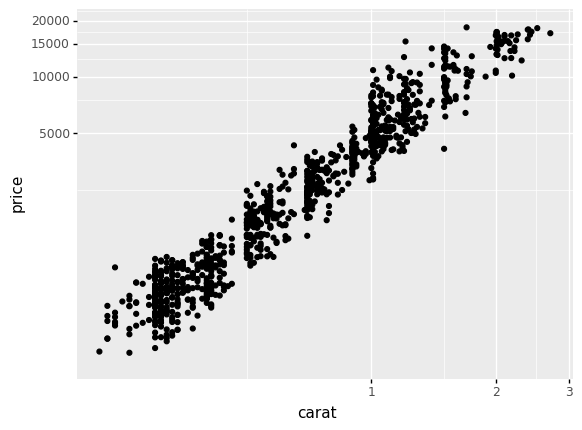

<ggplot: (343453160)>

In [210]:
# Transforming the coordinate system
# Coordinate system transformations are the final step in
# drawing the graphic, and affect the shape of geometric objects.  Here
# a straight line becomes a curve, and demonstrates why fitting a
# linear model to the untranformed data is such a bad idea.

# qplot("carat", "price", data = diamondsk) + lmfit + coord_trans(y="log10", y="log10")
qplot("carat", "price", data = diamondsk) + \
    coord_trans(x="log10", y="log10") + ylim(300,18692)

In [208]:
# Minimal example of coord_trans(y="log10") bug
# # same as above but with LM's se turned off
# ggplot(df, aes(x="x", y="y")) + \
#     geom_point() + \
#     coord_trans(x="log10", y="log10") + \
#     geom_smooth(method="lm", se=False)


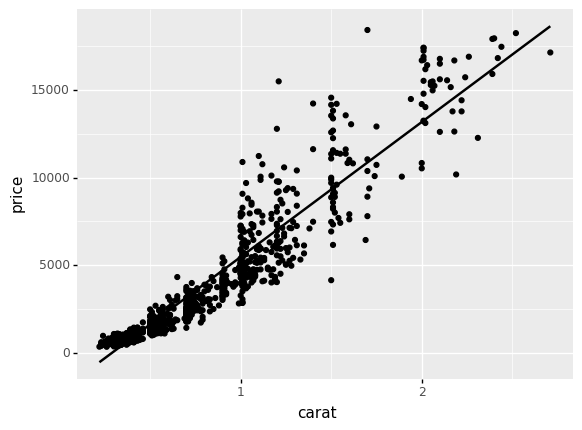

<ggplot: (-9223372036510328846)>

In [236]:
# Linear model fit to raw data (left)
qplot("carat", "price", data = diamondsk) + lmfit


In [235]:
# # linear model fit to logged data, then back-transformed to original scale (right).
# from mizani.transforms import exp_trans

# exp10 = exp_trans(10)
# qplot("carat", "price", data = diamondsk, log="xy")  + lmfit + \
#     coord_trans(x=exp10, y = exp10)